In [3]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
from tqdm import tqdm;
from plotly import __version__;
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot;
import plotly.graph_objs as go;
import cufflinks as cf;
import networkx as nx;
import time;
%matplotlib inline

## Load Datasets

In [4]:
df_prompts = pd.read_csv('Hyelim_5k.csv');
df_prompts = df_prompts.drop(columns = ['Unnamed: 0','id'])
df_prompts

,image,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"a renaissance portrait of dwayne johnson, art ...",2480545905,50,16.0,k_euler_ancestral,512.0,768.0,e9dfc969d22cb9c5621ad075b3826c28f18ef3840c6dda...,2022-08-20 05:28:00+00:00,0.163488,0.000793
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"portrait of a dancing eagle woman, beautiful b...",2250159284,50,9.0,k_lms,512.0,640.0,aa60a36693bf9e079b421c1200fd42ed94061fb02078ad...,2022-08-20 05:28:00+00:00,0.276650,0.003090
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"epic 3 d, become legend shiji! gpu mecha contr...",4292948605,50,7.0,k_lms,512.0,768.0,3e774662f24c78b0590d57365d755d7dacde8f33dbdc56...,2022-08-20 05:28:00+00:00,0.090421,0.000533
3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,an airbrush painting of cyber war machine scen...,2374713726,50,12.0,k_lms,512.0,768.0,c2bd0b60caa0aa04d0a7e5972fefc60b21ece352d88353...,2022-08-20 05:29:00+00:00,0.078309,0.000597
4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,concept art of a silent hill monster. painted ...,2320897141,50,6.0,k_lms,640.0,512.0,08ac4153ab7e13baa55ee74213eb117a29a0024267b29e...,2022-08-20 05:29:00+00:00,0.086802,0.083516
...,...,...,...,...,...,...,...,...,...,...,...,...
2443,<PIL.PngImagePlugin.PngImageFile image mode=RG...,cyborg robot ninja mask terminator t 1 0 0 0 f...,1365474359,50,7.0,k_lms,512.0,512.0,89bebf4f200a853ac9a7b4dfec1edb160ade299fd60db1...,2022-08-19 09:56:00+00:00,0.314930,0.001604
2444,<PIL.PngImagePlugin.PngImageFile image mode=RG...,an enourmous battlefield between the forces of...,1844953345,50,7.0,k_lms,1600.0,320.0,b55f8b6100b9d940fec066c9e9a62e2b38d3ae9763b2eb...,2022-08-19 09:56:00+00:00,0.112661,0.001395
2445,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"landscape background, owlboy style, no people,...",4063258800,50,7.0,k_lms,512.0,512.0,a3b7ecebd23cb0444d026d9ca8e7facd2db7ef4122c2c5...,2022-08-19 09:57:00+00:00,0.094144,0.001525
2446,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"landscape background, owlboy, souldiers, no pe...",1760895847,50,7.0,k_lms,512.0,512.0,a3b7ecebd23cb0444d026d9ca8e7facd2db7ef4122c2c5...,2022-08-19 09:58:00+00:00,0.125734,0.001350


In [5]:
df_Yolo = pd.read_csv('YOLO_results.csv')
df_Yolo = df_Yolo.drop(columns = 'Unnamed: 0')
df_Yolo

,filenames,scores,classes,class label
0,im_in_0.png,[ [0.98582095 0.3349454 0.30242687 0. ...,[ [ 0. 77. 59. 0. 0. 0. 0. 0. 0. 0. 0....,[person bicycle car]
1,im_in_1.png,[ [0.8281204 0. 0. 0. 0. ...,[ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,[person]
2,im_in_10.png,[ [0.6871961 0.44457653 0. 0. ...,[ [ 0. 59. 0. 0. 0. 0. 0. 0. 0. 0. 0....,[person bicycle]
3,im_in_100.png,[ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,[ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,[]
4,im_in_1000.png,[ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,[ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,[]
...,...,...,...,...
4995,im_in_995.png,[ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,[ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,[]
4996,im_in_996.png,[ [0.65885437 0. 0. 0. ...,[ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,[person]
4997,im_in_997.png,[ [0.7106069 0.2977581 0. 0. 0. ...,[ [ 0. 62. 0. 0. 0. 0. 0. 0. 0. 0. 0....,[person bicycle]
4998,im_in_998.png,[ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,[ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,[]


In [6]:
type(df_Yolo['class label'][0])

str

In [7]:
df_Yolo['class label'] = df_Yolo['class label'].apply(lambda x: x[1:-1].split(' '));

In [8]:
df_prompts['yolo_objs'] = df_Yolo['class label']

## Create Bag of Words [Section not used and abandoned]

In [9]:
from nltk.tokenize import RegexpTokenizer;
tokenizer = RegexpTokenizer(r'\w+');

In [10]:
#df_prompts['prompt'].apply(lambda x: tokenizer.tokenize(x))
df_prompts['BOW_prompt'] = df_prompts['prompt'].apply(lambda x: tokenizer.tokenize(str(x)))

In [11]:
df_prompts.head()

,image,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw,yolo_objs,BOW_prompt
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"a renaissance portrait of dwayne johnson, art ...",2480545905,50,16.0,k_euler_ancestral,512.0,768.0,e9dfc969d22cb9c5621ad075b3826c28f18ef3840c6dda...,2022-08-20 05:28:00+00:00,0.163488,0.000793,"[person, bicycle, car]","[a, renaissance, portrait, of, dwayne, johnson..."
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"portrait of a dancing eagle woman, beautiful b...",2250159284,50,9.0,k_lms,512.0,640.0,aa60a36693bf9e079b421c1200fd42ed94061fb02078ad...,2022-08-20 05:28:00+00:00,0.276650,0.003090,[person],"[portrait, of, a, dancing, eagle, woman, beaut..."
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"epic 3 d, become legend shiji! gpu mecha contr...",4292948605,50,7.0,k_lms,512.0,768.0,3e774662f24c78b0590d57365d755d7dacde8f33dbdc56...,2022-08-20 05:28:00+00:00,0.090421,0.000533,"[person, bicycle]","[epic, 3, d, become, legend, shiji, gpu, mecha..."
3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,an airbrush painting of cyber war machine scen...,2374713726,50,12.0,k_lms,512.0,768.0,c2bd0b60caa0aa04d0a7e5972fefc60b21ece352d88353...,2022-08-20 05:29:00+00:00,0.078309,0.000597,[],"[an, airbrush, painting, of, cyber, war, machi..."
4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,concept art of a silent hill monster. painted ...,2320897141,50,6.0,k_lms,640.0,512.0,08ac4153ab7e13baa55ee74213eb117a29a0024267b29e...,2022-08-20 05:29:00+00:00,0.086802,0.083516,[],"[concept, art, of, a, silent, hill, monster, p..."


In [39]:
is_req_prompt = np.zeros(5000)
for i in tqdm(range(len(df_prompts))):
  for j in df_prompts.iloc[i]['yolo_objs']:
    if j in df_prompts.iloc[i]['BOW_prompt']:
      is_req_prompt[i] += 1
    print (j in df_prompts.iloc[i]['BOW_prompt'])

  3%|▎         | 139/5000 [00:00<00:03, 1383.47it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

  8%|▊         | 380/5000 [00:00<00:05, 891.54it/s]


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

 11%|█         | 556/5000 [00:00<00:05, 790.29it/s]


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

 15%|█▍        | 740/5000 [00:00<00:04, 853.70it/s]


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fal

 17%|█▋        | 834/5000 [00:00<00:04, 878.22it/s]


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fal

 20%|██        | 1013/5000 [00:01<00:05, 719.39it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

 22%|██▏       | 1090/5000 [00:01<00:05, 667.54it/s]


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fal

 25%|██▍       | 1228/5000 [00:01<00:05, 635.18it/s]


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fal

 28%|██▊       | 1399/5000 [00:01<00:04, 724.16it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

 31%|███       | 1545/5000 [00:02<00:05, 663.56it/s]


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fal

 33%|███▎      | 1635/5000 [00:02<00:04, 726.05it/s]


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fal

 37%|███▋      | 1828/5000 [00:02<00:03, 797.82it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

 41%|████▏     | 2063/5000 [00:02<00:03, 935.17it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

 46%|████▌     | 2289/5000 [00:02<00:02, 1014.47it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

 48%|████▊     | 2393/5000 [00:02<00:02, 969.57it/s] 

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

 53%|█████▎    | 2651/5000 [00:03<00:02, 869.85it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

 58%|█████▊    | 2895/5000 [00:03<00:02, 929.51it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

 60%|█████▉    | 2990/5000 [00:03<00:02, 815.91it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

 63%|██████▎   | 3153/5000 [00:03<00:02, 652.64it/s]


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

 64%|██████▍   | 3222/5000 [00:04<00:02, 616.06it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

 71%|███████   | 3540/5000 [00:04<00:01, 870.52it/s]


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

 75%|███████▌  | 3768/5000 [00:04<00:01, 839.36it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

 79%|███████▉  | 3973/5000 [00:04<00:01, 790.22it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

 83%|████████▎ | 4168/5000 [00:05<00:00, 1072.32it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

 90%|████████▉ | 4486/5000 [00:05<00:00, 1160.47it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

 93%|█████████▎| 4630/5000 [00:05<00:00, 1124.94it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

 97%|█████████▋| 4857/5000 [00:05<00:00, 892.77it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

100%|██████████| 5000/5000 [00:05<00:00, 840.68it/s]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [38]:
is_req_prompt

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
len(is_req_prompt)

5000

In [36]:
df_prompts.iloc[0]['yolo_objs']

['person', 'bicycle', 'car']

In [40]:
temp = df_prompts.iloc[0]['yolo_objs']

In [56]:
df_prompts[:1]['yolo_objs'] = ['dwayne']

In [44]:
df_prompts.iloc[0]['yolo_objs'] in df_prompts.iloc[0]['BOW_prompt']

False

In [53]:
df_prompts.iloc[0]['yolo_objs']

['person', 'bicycle', 'car']

In [46]:
df_prompts.iloc[0]['BOW_prompt']

['a',
 'renaissance',
 'portrait',
 'of',
 'dwayne',
 'johnson',
 'art',
 'in',
 'the',
 'style',
 'of',
 'rembrandt',
 'intricate',
 'ultra',
 'detailed',
 'oil',
 'on',
 'canvas',
 'wet',
 'on',
 'wet',
 'technique',
 'pay',
 'attention',
 'to',
 'facial',
 'details',
 'highly',
 'realistic',
 'cinematic',
 'lightning',
 'intricate',
 'textures',
 'illusionistic',
 'detail']

In [57]:
df_prompts[:1]

,image,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw,yolo_objs,BOW_prompt
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"a renaissance portrait of dwayne johnson, art ...",2480545905,50,16.0,k_euler_ancestral,512,768,e9dfc969d22cb9c5621ad075b3826c28f18ef3840c6dda...,2022-08-20 05:28:00+00:00,0.163488,0.000793,"[person, bicycle, car]","[a, renaissance, portrait, of, dwayne, johnson..."


In [117]:
#df_prompts['prompt'].apply(lambda x: tokenizer.tokenize(x))
#df_prompts['BOW_prompt'] = df_prompts['prompt'].apply(lambda x: tokenizer.tokenize(str(x)))
temp_df = df_prompts.copy(deep = True)

for i in range(len(temp_df)):
  print (i);
  for j in i['yolo_objs']:
    if (len(tokenizer.tokenize(j)) > 2):
      print ('splittable detected!')
      for k in tokenizer.tokenize(j):
        i['yolo_objs'].append(k)


image


TypeError: ignored

In [116]:
temp_df

,image,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw,yolo_objs,BOW_prompt,Yolo objects requested in prompts
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"a renaissance portrait of dwayne johnson, art ...",2480545905,50,16.0,k_euler_ancestral,512,768,e9dfc969d22cb9c5621ad075b3826c28f18ef3840c6dda...,2022-08-20 05:28:00+00:00,0.163488,0.000793,"[person, bicycle, car]","[a, renaissance, portrait, of, dwayne, johnson...",0.0
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"portrait of a dancing eagle woman, beautiful b...",2250159284,50,9.0,k_lms,512,640,aa60a36693bf9e079b421c1200fd42ed94061fb02078ad...,2022-08-20 05:28:00+00:00,0.276650,0.003090,[person],"[portrait, of, a, dancing, eagle, woman, beaut...",0.0
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"epic 3 d, become legend shiji! gpu mecha contr...",4292948605,50,7.0,k_lms,512,768,3e774662f24c78b0590d57365d755d7dacde8f33dbdc56...,2022-08-20 05:28:00+00:00,0.090421,0.000533,"[person, bicycle]","[epic, 3, d, become, legend, shiji, gpu, mecha...",0.0
3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,an airbrush painting of cyber war machine scen...,2374713726,50,12.0,k_lms,512,768,c2bd0b60caa0aa04d0a7e5972fefc60b21ece352d88353...,2022-08-20 05:29:00+00:00,0.078309,0.000597,[],"[an, airbrush, painting, of, cyber, war, machi...",0.0
4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,concept art of a silent hill monster. painted ...,2320897141,50,6.0,k_lms,640,512,08ac4153ab7e13baa55ee74213eb117a29a0024267b29e...,2022-08-20 05:29:00+00:00,0.086802,0.083516,[],"[concept, art, of, a, silent, hill, monster, p...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,<PIL.PngImagePlugin.PngImageFile image mode=RG...,interior view overlooking a spectacular incred...,346653201,50,7.0,k_lms,768,512,9e1ee59715df5370f703859a2b08619783e31f55c05823...,2022-08-18 06:07:00+00:00,0.072178,0.000371,[],"[interior, view, overlooking, a, spectacular, ...",0.0
4996,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"bob's burger in real life, realistic studio po...",3800480963,50,7.0,k_lms,512,512,54b2df12bb414eea9c279db790f540ded186afc1aed11a...,2022-08-18 06:07:00+00:00,0.099427,0.001652,[person],"[bob, s, burger, in, real, life, realistic, st...",0.0
4997,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"sushi, photography, by albert bierstadt",2715314798,50,7.0,k_lms,512,512,86480055e786bf83218e6d78ad478d82cf259539ebfb61...,2022-08-18 06:09:00+00:00,0.050295,0.000596,"[person, bicycle]","[sushi, photography, by, albert, bierstadt]",0.0
4998,<PIL.PngImagePlugin.PngImageFile image mode=RG...,a sky stream of white streamers in a sea of ch...,2692614558,50,7.0,k_lms,768,512,cd97d9445db1a0576e6c62551e99e252be37d92ab54067...,2022-08-18 06:09:00+00:00,0.157416,0.000732,[],"[a, sky, stream, of, white, streamers, in, a, ...",0.0


### An edited list of YOLO class models. This was going to be used for evaluation but that would've only evaluated YOLO's capabilities and not our model's.

In [12]:
# EDITED FROM URL: https://github.com/theAIGuysCode/tensorflow-yolov4-tflite/blob/master/data/classes/coco.names
Yolo_class_list = ['person',
'bicycle',
'car',
'motorbike',
'aeroplane',
'bus',
'train',
'truck',
'boat',
'traffic',
'light',
'fire',
'hydrant',
'stop', 
'sign',
'parking',
'meter',
'bench',
'bird',
'cat',
'dog',
'horse',
'sheep',
'cow',
'elephant',
'bear',
'zebra',
'giraffe',
'backpack',
'umbrella',
'handbag',
'tie',
'suitcase',
'frisbee',
'skis',
'snowboard',
'sports',
'ball',
'kite',
'baseball',
'bat',
'baseball',
'glove',
'skateboard',
'surfboard',
'tennis',
'racket',
'bottle',
'wine',
'glass'
'cup',
'fork',
'knife',
'spoon',
'bowl',
'banana',
'apple',
'sandwich',
'orange',
'broccoli',
'carrot',
'hot dog',
'pizza',
'donut',
'cake',
'chair',
'sofa',
'potted plant',
'bed',
'dining table',
'toilet',
'tvmonitor',
'laptop',
'mouse',
'remote',
'keyboard',
'cell phone',
'microwave',
'oven',
'toaster',
'sink',
'refrigerator',
'book',
'clock',
'vase',
'scissors',
'teddy',
'bear',
'hair',
'drier',
'toothbrush'] 

In [106]:
is_req_prompt = np.zeros(5000)
for i in tqdm(range(len(df_prompts))):
  for j in df_prompts.iloc[i]['yolo_objs']:
    if j in df_prompts.iloc[i]['BOW_prompt']:
      print (j)
      #print (j in Yolo_class_list)
      is_req_prompt[i] += 1

 18%|█▊        | 912/5000 [00:00<00:00, 4646.81it/s]

light
bicycle
person
person
person
person
person
person
fire
person
person
light


 67%|██████▋   | 3338/5000 [00:00<00:00, 4536.37it/s]

light
light
light
car
light


 85%|████████▌ | 4254/5000 [00:00<00:00, 4555.73it/s]

light
bicycle
car
person
bicycle
person
light
car
bus
light


100%|██████████| 5000/5000 [00:01<00:00, 4606.76it/s]

car
person
person


In [107]:
len(is_req_prompt[is_req_prompt > 0])

30

In [108]:
df_prompts['Yolo objects requested in prompts'] = is_req_prompt

In [109]:
from google.colab import files;
df_prompts.to_csv('yolo_prompt_based_eval.csv');
files.download('yolo_prompt_based_eval.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
where_obj_detected = len(df_prompts[df_prompts['Yolo objects requested in prompts'] > 0])
where_obj_detected

993

In [100]:
num_prompts = len(df_prompts);
num_prompts

5000

In [102]:
accuracy = where_obj_detected / num_prompts * 100
accuracy

19.86

In [104]:
print ('accuracy*: ', (len(df_prompts[df_prompts['Yolo objects requested in prompts'] > 0]) / len(df_prompts.index) * 100))

accuracy*:  19.86


## Bar Plot for detected object count [Relevant Section]
This graph generated shows total detected objects in all images 

In [27]:
obj_list = []
for i in tqdm(df_Yolo['class label']):
  for j in i:
    obj_list.append(j)

100%|██████████| 5000/5000 [00:00<00:00, 128832.73it/s]


In [25]:
df_prompts['yolo_objs']

0                                  [person, bicycle, car]
1                                                [person]
2                                       [person, bicycle]
3                                                      []
4                                                      []
                              ...                        
2443                                             [person]
2444    [person, bicycle, car, motorbike, aeroplane, b...
2445                                                   []
2446                                             [person]
2447    [person, bicycle, car, motorbike, aeroplane, b...
Name: yolo_objs, Length: 2448, dtype: object

<Axes: >

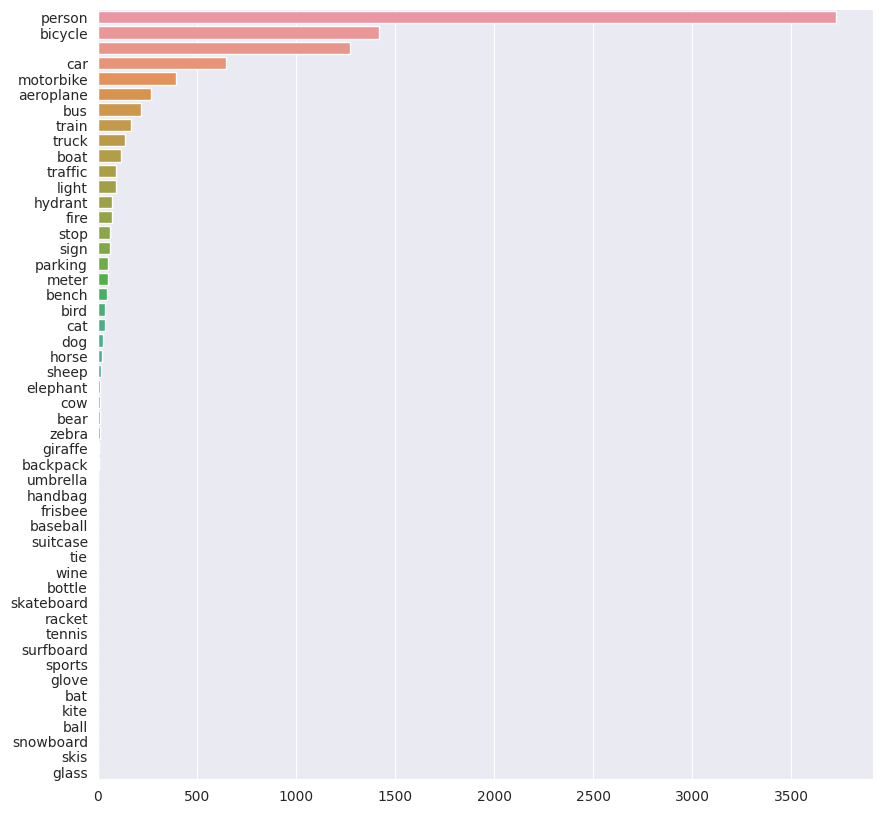

In [47]:
sns.set_style('darkgrid');
sns.set_palette('viridis');
plt.figure(figsize = (10, 10))
sns.barplot(y = pd.DataFrame(obj_list)[0].value_counts().index, x = pd.DataFrame(obj_list)[0].value_counts().values)

In [40]:
## numeric representation of graph values projected above
pd.DataFrame(obj_list)[0].value_counts()

person        3725
bicycle       1420
              1275
car            647
motorbike      393
aeroplane      271
bus            216
train          167
truck          140
boat           115
traffic         93
light           93
hydrant         73
fire            73
stop            63
sign            63
parking         54
meter           54
bench           45
bird            39
cat             35
dog             25
horse           20
sheep           15
elephant        11
cow             11
bear            10
zebra            9
giraffe          7
backpack         5
umbrella         3
handbag          3
frisbee          2
baseball         2
suitcase         2
tie              2
wine             1
bottle           1
skateboard       1
racket           1
tennis           1
surfboard        1
sports           1
glove            1
bat              1
kite             1
ball             1
snowboard        1
skis             1
glass            1
Name: 0, dtype: int64